# Stock Forecasting using Prophet

https://facebook.github.io/prophet/

In [4]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [5]:
stock = 'TSLA' # input
start = '2012-01-01' # input 
end = '2022-04-28'  # input
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


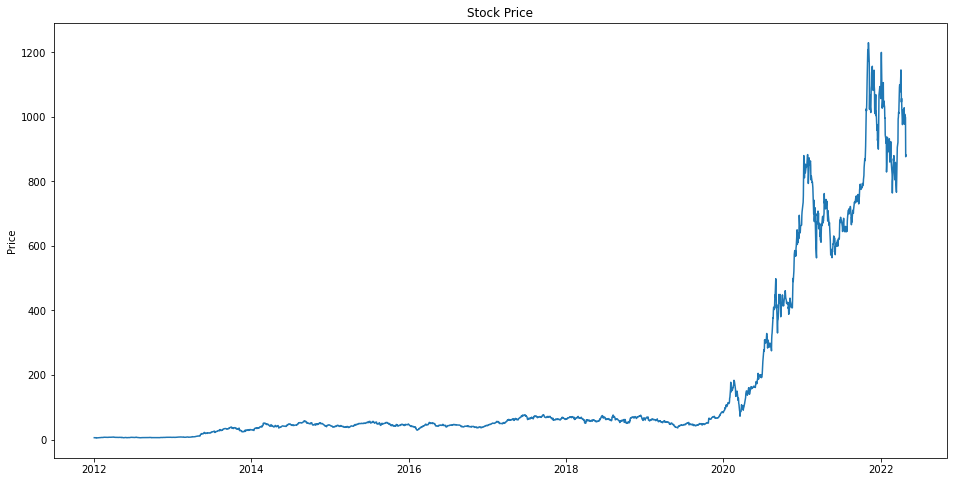

In [6]:
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'])
plt.title('Stock Price')
plt.ylabel('Price')
plt.show()

In [7]:
df = df.reset_index()
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
df

,ds,Open,High,Low,y,Adj Close,Volume
0,2012-01-03,5.788000,5.900000,5.530000,5.616000,5.616000,4640500
1,2012-01-04,5.642000,5.734000,5.500000,5.542000,5.542000,3150500
2,2012-01-05,5.552000,5.586000,5.370000,5.424000,5.424000,5027500
3,2012-01-06,5.440000,5.558000,5.282000,5.382000,5.382000,4931500
4,2012-01-09,5.400000,5.498000,5.224000,5.450000,5.450000,4485000
...,...,...,...,...,...,...,...
2592,2022-04-21,1074.729980,1092.219971,996.419983,1008.780029,1008.780029,35138800
2593,2022-04-22,1014.909973,1034.849976,994.000000,1005.049988,1005.049988,23181600
2594,2022-04-25,978.969971,1008.619995,975.299988,998.020020,998.020020,22780400
2595,2022-04-26,995.429993,1000.000000,875.000000,876.419983,876.419983,45377900


In [8]:
df = df[['ds', 'y']]
df

,ds,y
0,2012-01-03,5.616000
1,2012-01-04,5.542000
2,2012-01-05,5.424000
3,2012-01-06,5.382000
4,2012-01-09,5.450000
...,...,...
2592,2022-04-21,1008.780029
2593,2022-04-22,1005.049988
2594,2022-04-25,998.020020
2595,2022-04-26,876.419983


In [9]:
m = Prophet()
m.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -104.474
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6729.15     0.0169834       1231.18      0.4028           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        6759.4   0.000433589       191.019           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6766.71    0.00326794       143.119           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     335          6770   9.30034e-05       167.814   2.427e-07       0.001      441  LS failed, Hessian reset 
     399       6774.84    0.00403612       126.659           1           1      513   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     418       6775.89   4.62588e-05    

95  LS failed, Hessian reset 
     499       6778.78   0.000629728       128.889      0.7929      0.7929      700   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     533       6780.01   4.52354e-05       100.731   2.963e-07       0.001      787  LS failed, Hessian reset 
     599       6780.51   9.81105e-05       106.358           1           1      871   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       6786.81    0.00124188        129.77      0.9835      0.9835      988   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     727       6787.69   0.000214731       385.244   6.846e-07       0.001     1061  LS failed, Hessian reset 
     799        6788.5   2.33639e-06       74.7001      0.2563           1     1157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     808        6788.5   3.48625

In [10]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2957,2023-04-23
2958,2023-04-24
2959,2023-04-25
2960,2023-04-26
2961,2023-04-27


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2957,2023-04-23,1510.021083,1436.427204,1589.084301
2958,2023-04-24,1508.013042,1432.929983,1583.146250
2959,2023-04-25,1508.548540,1430.677736,1583.351250
2960,2023-04-26,1509.719975,1432.305239,1585.354039
2961,2023-04-27,1510.182283,1441.030466,1588.500901


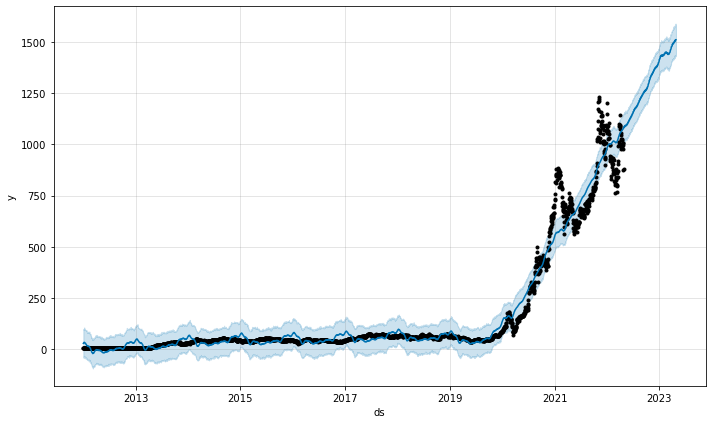

In [12]:
fig1 = m.plot(forecast)

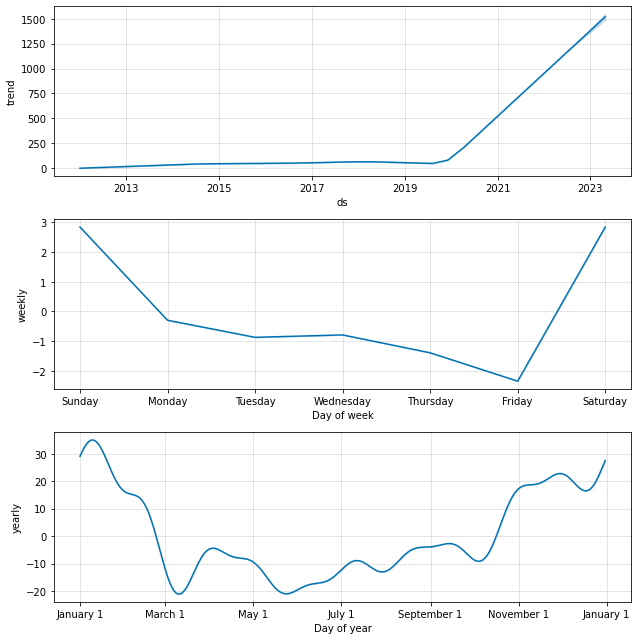

In [13]:
fig2 = m.plot_components(forecast)